In [1]:
import numpy as np
import polyscope as ps
import trimesh
import matplotlib.pyplot as plt

In [2]:
ps.init()
ps.set_ground_plane_mode("shadow_only")

radius = 1
observations = 1000

[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.1 Metal - 88


In [3]:
def generate_point_on_sphere():
    x1, x2, x3 = np.random.randn(3)

    norm = np.sqrt(x1**2+x2**2+x3**2)
    while norm < 0.001:
        norm = np.sqrt(x1**2+x2**2+x3**2)

    unit_vec = np.array([x1, x2, x3]) / norm
    return unit_vec

In [4]:
def get_phi_theta_angles(points):
    theta = []
    phi = []
    for i in range(len(points)):
        point = points[i]
        x, y, z = point
        theta_i = np.arccos(z)
        phi_i= np.arctan2(y, x)

        theta.append(theta_i)
        phi.append(phi_i)
    return (theta, phi)

In [5]:

sphere = trimesh.primitives.Sphere(radius=radius)
vertices = sphere.vertices
faces = sphere.faces
ps.register_surface_mesh("my_sphere", vertices, faces, transparency=0.2, material="ceramic")

In [6]:
points = [generate_point_on_sphere() for _ in range(observations)]
points_np = np.array(points)
ps.register_point_cloud("sphere_points", points_np)
ps.show()

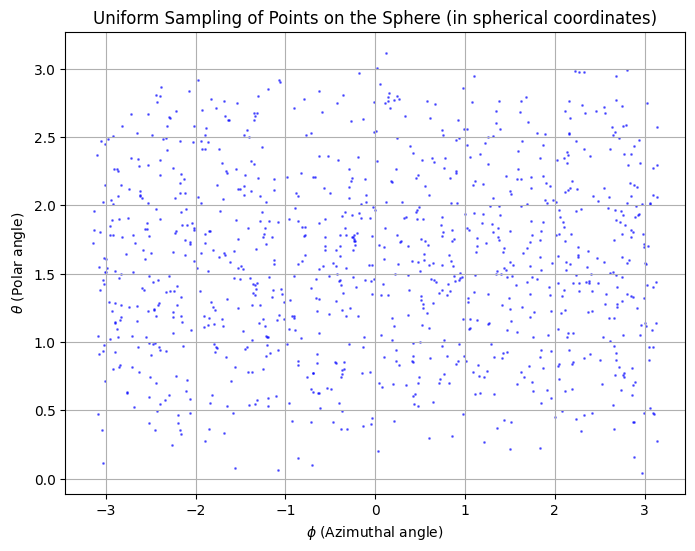

: 

In [ ]:
theta, phi = get_phi_theta_angles(points)
plt.figure(figsize=(8, 6))
plt.scatter(phi, theta, s=1, color='b', alpha=0.5)  # Scatter plot
plt.xlabel(r'$\phi$ (Azimuthal angle)')
plt.ylabel(r'$\theta$ (Polar angle)')
plt.title('Uniform Sampling of Points on the Sphere (in spherical coordinates)')
plt.grid(True)
plt.show()